In [1]:
!pip install numpy pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv("bot_testing.csv")
print(df.head())

                 bot  move  depth       time  \
0  bot_classic_depth  b4c3      1   0.040377   
1  bot_classic_depth  e6d5      2   1.392366   
2     bot_alpha_beta  b4c3      1   0.036032   
3     bot_alpha_beta  e6d5      2   0.754048   
4     bot_alpha_beta  b4c3      3  10.049984   

                                                 fen  
0  r3k2r/p1ppqpb1/Bn2pnp1/3PN3/1p2P3/2N2Q1p/PPPB1...  
1  r3k2r/p1ppqpb1/Bn2pnp1/3PN3/1p2P3/2N2Q1p/PPPB1...  
2  r3k2r/p1ppqpb1/Bn2pnp1/3PN3/1p2P3/2N2Q1p/PPPB1...  
3  r3k2r/p1ppqpb1/Bn2pnp1/3PN3/1p2P3/2N2Q1p/PPPB1...  
4  r3k2r/p1ppqpb1/Bn2pnp1/3PN3/1p2P3/2N2Q1p/PPPB1...  


In [3]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('\ufeff', '', regex=True)

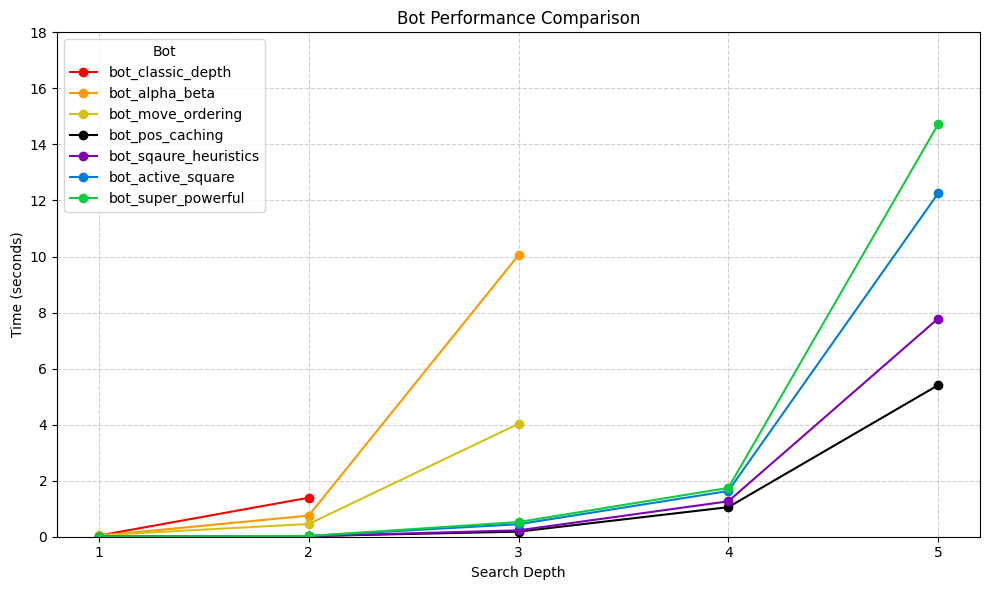

In [35]:
colors = {
    "bot_classic_depth"     : "#ff0000",
    "bot_alpha_beta"        : "#ff9900",
    "bot_move_ordering"     : "#d6c018",
    "bot_pos_caching"       : "#000000",
    "bot_sqaure_heuristics" : "#8000B7",
    "bot_active_square"     : "#007ED7",
    "bot_super_powerful"    : "#12CB3D",
}

plt.figure(figsize=(10, 6))

for bot_name in colors.keys():
    group = df[df["bot"] == bot_name]
    if not group.empty:
        color = colors.get(bot_name, None)
        plt.plot(group["depth"], group["time"], marker="o", color=color, label=bot_name)

plt.title("Bot Performance Comparison")
plt.xlabel("Search Depth")
plt.ylabel("Time (seconds)")
plt.legend(title="Bot", loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(sorted(df["depth"].unique()))
plt.ylim(0, 18)
plt.tight_layout()
plt.show()
